In [1]:
# Face Recognition

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

In [62]:
haar_cascade = cv.CascadeClassifier("/content/drive/MyDrive/Colab Notebooks/opencv_for_python/3_faces/haarcascade_frontalface_default.xml")

In [63]:
people = ['Ben Afflek', 'Elton John', 'Jerry Seinfield', 'Madonna', 'Mindy Kaling']
#features = np.load('/content/drive/MyDrive/Colab Notebooks/opencv_for_python/3_faces/features.npy', allow_pickle=True)
#labels = np.load('/content/drive/MyDrive/Colab Notebooks/opencv_for_python/3_faces/labels.npy', allow_pickle=True)

In [64]:
face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.read('/content/drive/MyDrive/Colab Notebooks/opencv_for_python/3_faces/face_trained.yml')

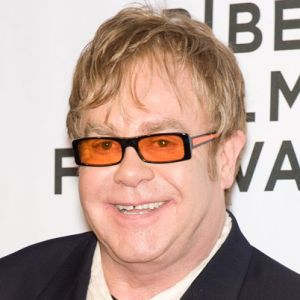

In [65]:
img = cv.imread(r"/content/drive/MyDrive/Colab Notebooks/opencv_for_python/Resources/Faces/val/elton_john/1.jpg")
cv2_imshow(img)

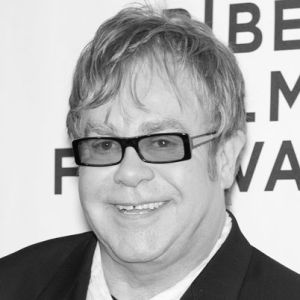

In [66]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [67]:
# Detect the face in the image

Label = Elton John with confidence of 67.00856809674691


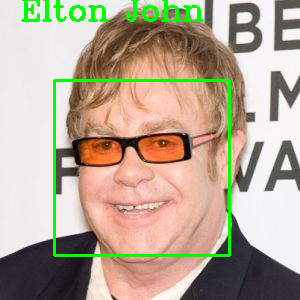

-1

In [68]:
faces_rect = haar_cascade.detectMultiScale(gray, 1.1, 4)

for (x,y,w,h) in faces_rect:
        faces_roi = gray[y:y+h, x:x+w]

        label, confidence = face_recognizer.predict(faces_roi)
        print(f"Label = {people[label]} with confidence of {confidence}")

        cv.putText(img, str(people[label]), (20,20), cv.FONT_HERSHEY_COMPLEX, 1.0, (0,255,0), thickness = 2)
        cv.rectangle(img,(x,y),(x+w,y+h), (0,255,0), thickness = 2)

cv2_imshow(img)
cv.waitKey(0) 